<a href="https://colab.research.google.com/github/OmerAGilin/Road2-AI-Course/blob/main/Road2_AI_Course_lesson_5_Color_Alternative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

good evening. please prepare to write code in python and keras, but don't write anything yet, and be aware that i'm using google colab

please write code that looks the dataset containd in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 5/cats_and_dogs_filtered, and prints its analytical breakdown. make note to distinguish between the training section and the testing section

In [1]:
import os

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/lesson 5/cats_and_dogs_filtered'

# Define the paths for the training and testing datasets
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'validation')  # Note: Validation set is often used as the test set

# Function to get the counts of images in each class
def get_dataset_counts(directory):
    class_counts = {}
    for class_label in os.listdir(directory):
        class_path = os.path.join(directory, class_label)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_label] = num_images
    return class_counts

# Analytical breakdown for the training set
train_counts = get_dataset_counts(train_dir)
print("Training Set:")
for class_label, count in train_counts.items():
    print(f"{class_label}: {count} images")

# Analytical breakdown for the testing set
test_counts = get_dataset_counts(test_dir)
print("\nTesting Set:")
for class_label, count in test_counts.items():
    print(f"{class_label}: {count} images")


Training Set:
cats: 1000 images
dogs: 1000 images

Testing Set:
dogs: 500 images
cats: 500 images


now, please write code that creates a copy of this dataset, but does the following things to each image:

1. resize to 150 by 150 pixels

2. prints a counter of the amount of images proccessed so far

the new dataset is to be saved in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import shutil

# Define the paths for the original and new datasets
original_dataset_path = '/content/drive/MyDrive/Colab Notebooks/lesson 5/cats_and_dogs_filtered'
new_dataset_path = '/content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color'

# Create a data generator for image processing
datagen = ImageDataGenerator(rescale=1./255)

# Function to resize and save images
def resize_and_save_images(src_dir, dest_dir, target_size=(150, 150)):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for class_label in os.listdir(src_dir):
        class_src_path = os.path.join(src_dir, class_label)
        class_dest_path = os.path.join(dest_dir, class_label)

        if not os.path.exists(class_dest_path):
            os.makedirs(class_dest_path)

        for img_name in os.listdir(class_src_path):
            img_path = os.path.join(class_src_path, img_name)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)

            # Save the resized image
            save_path = os.path.join(class_dest_path, img_name)
            image.save_img(save_path, img_array[0])

            print(f"Processed: {os.path.join(class_label, img_name)}")

# Resize and save images in the new dataset
resize_and_save_images(original_dataset_path + '/train', new_dataset_path + '/train')
resize_and_save_images(original_dataset_path + '/validation', new_dataset_path + '/validation')


Processed: cats/cat.127.jpg
Processed: cats/cat.119.jpg
Processed: cats/cat.125.jpg
Processed: cats/cat.126.jpg
Processed: cats/cat.121.jpg
Processed: cats/cat.124.jpg
Processed: cats/cat.120.jpg
Processed: cats/cat.118.jpg
Processed: cats/cat.122.jpg
Processed: cats/cat.123.jpg
Processed: cats/cat.73.jpg
Processed: cats/cat.100.jpg
Processed: cats/cat.78.jpg
Processed: cats/cat.68.jpg
Processed: cats/cat.75.jpg
Processed: cats/cat.90.jpg
Processed: cats/cat.92.jpg
Processed: cats/cat.102.jpg
Processed: cats/cat.114.jpg
Processed: cats/cat.106.jpg
Processed: cats/cat.83.jpg
Processed: cats/cat.81.jpg
Processed: cats/cat.93.jpg
Processed: cats/cat.96.jpg
Processed: cats/cat.101.jpg
Processed: cats/cat.98.jpg
Processed: cats/cat.82.jpg
Processed: cats/cat.71.jpg
Processed: cats/cat.109.jpg
Processed: cats/cat.67.jpg
Processed: cats/cat.70.jpg
Processed: cats/cat.72.jpg
Processed: cats/cat.91.jpg
Processed: cats/cat.104.jpg
Processed: cats/cat.95.jpg
Processed: cats/cat.105.jpg
Processed:

now, please write a code that acesses the new dataset in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color, and prints images from it in this order:

5 images of cats from the training section
5 images of dogs from the training section
5 images of cats from the testing section
5 images of dogs from the testing section

5 images of cats from the training section:


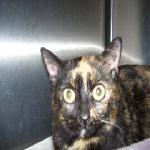

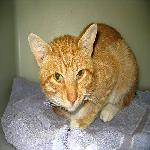

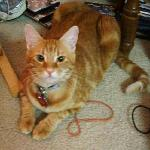

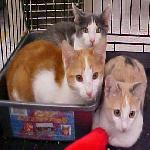

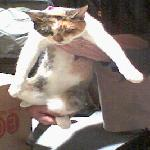


5 images of dogs from the training section:


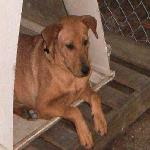

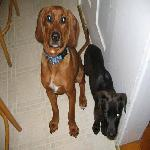

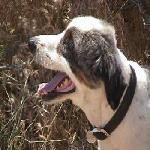

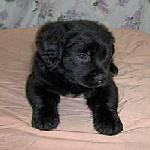

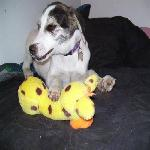


5 images of cats from the testing section:


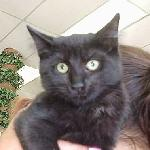

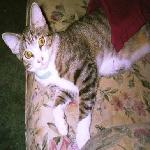

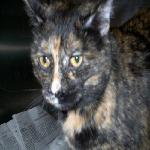

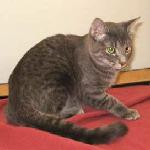

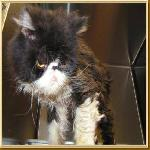


5 images of dogs from the testing section:


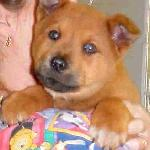

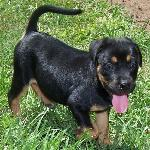

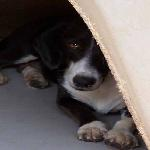

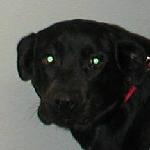

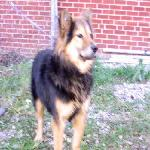

In [3]:
from IPython.display import display, Image
import os

# Define the path to the new dataset
new_dataset_path = '/content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color'

# Function to display images
def display_images(directory, class_label, num_images=5):
    class_path = os.path.join(directory, class_label)
    image_files = os.listdir(class_path)[:num_images]

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        display(Image(filename=img_path))

# Display 5 images of cats from the training section
print("5 images of cats from the training section:")
display_images(new_dataset_path + '/train', 'cats', 5)

# Display 5 images of dogs from the training section
print("\n5 images of dogs from the training section:")
display_images(new_dataset_path + '/train', 'dogs', 5)

# Display 5 images of cats from the testing section
print("\n5 images of cats from the testing section:")
display_images(new_dataset_path + '/validation', 'cats', 5)

# Display 5 images of dogs from the testing section
print("\n5 images of dogs from the testing section:")
display_images(new_dataset_path + '/validation', 'dogs', 5)


please write a code that shows the analytical breakdown of the new dataset in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color

In [4]:
import os

# Define the path to the new dataset
new_dataset_path = '/content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color'

# Function to get the counts of images in each class
def get_dataset_counts(directory):
    class_counts = {}
    for class_label in os.listdir(directory):
        class_path = os.path.join(directory, class_label)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_label] = num_images
    return class_counts

# Analytical breakdown for the training set in the new dataset
train_counts = get_dataset_counts(os.path.join(new_dataset_path, 'train'))
print("Training Set:")
for class_label, count in train_counts.items():
    print(f"{class_label}: {count} images")

# Analytical breakdown for the testing set in the new dataset
test_counts = get_dataset_counts(os.path.join(new_dataset_path, 'validation'))
print("\nTesting Set:")
for class_label, count in test_counts.items():
    print(f"{class_label}: {count} images")


Training Set:
cats: 1000 images
dogs: 1000 images

Testing Set:
dogs: 500 images
cats: 500 images


please create a convolution neural network using keras. the input of the network should be an image from the new dataset in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color. the following layers of the network are:

a convolution layer after padding the image, using 32 kernels in a size of 3 by 3, then a relu function, and then max pooling using a 2 by 2 kernel with a stride of 2

another convolution layer after padding the image, using 32 kernels in a size of 3 by 3, then a relu function, and then max pooling using a 2 by 2 kernel with a stride of 2

another convolution layer after padding the image, using 32 kernels in a size of 3 by 3, then a relu function, and then max pooling using a 2 by 2 kernel with a stride of 2

a softmax layer that chooses the most probable option as the output

after creating the network, please print its architecture

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add the first convolutional layer with max pooling
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add the second convolutional layer with max pooling
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add the third convolutional layer with max pooling
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output before the final softmax layer
model.add(Flatten())

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Print the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0

now, please train the network over 20 epoch in batches of 50, using adam's optimizer, using only the training section of both cats and dogs of the new dataset you created in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color. in the end, print the network's learning curve

Found 2000 images belonging to 2 classes.
Epoch 1/20
40/40 [==============================] - 17s 115ms/step - loss: 0.6948 - accuracy: 0.5295
Epoch 2/20
40/40 [==============================] - 5s 123ms/step - loss: 0.6566 - accuracy: 0.6095
Epoch 3/20
40/40 [==============================] - 5s 123ms/step - loss: 0.6007 - accuracy: 0.6860
Epoch 4/20
40/40 [==============================] - 6s 140ms/step - loss: 0.5493 - accuracy: 0.7250
Epoch 5/20
40/40 [==============================] - 5s 125ms/step - loss: 0.5154 - accuracy: 0.7400
Epoch 6/20
40/40 [==============================] - 5s 136ms/step - loss: 0.4891 - accuracy: 0.7645
Epoch 7/20
40/40 [==============================] - 5s 128ms/step - loss: 0.4447 - accuracy: 0.7965
Epoch 8/20
40/40 [==============================] - 5s 119ms/step - loss: 0.3864 - accuracy: 0.8240
Epoch 9/20
40/40 [==============================] - 5s 129ms/step - loss: 0.3422 - accuracy: 0.8530
Epoch 10/20
40/40 [==============================] - 6s 1

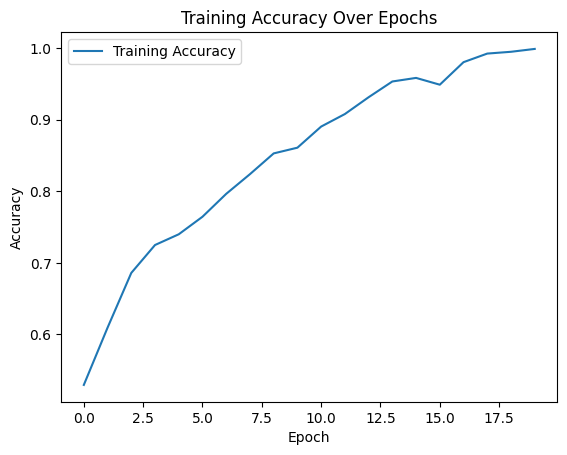

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the path to the training set in the new dataset
train_dataset_path = '/content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color/train'

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255)

# Flow from the directory and generate batches of augmented data
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=(150, 150),
    batch_size=50,
    class_mode='categorical'  # Assumes binary classification (cats vs. dogs)
)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20
)

# Plot the learning curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


please test the network using the enitre testing section in the dataset you created before in this folder: /content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color, and print a confusion matrix of the network's results

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Define the path to the testing set in the new dataset
test_dataset_path = '/content/drive/MyDrive/Colab Notebooks/lesson 5/dataset_color/validation'

# Create an ImageDataGenerator for normalization
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from the directory and generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(150, 150),
    batch_size=50,
    class_mode='categorical'  # Assumes binary classification (cats vs. dogs)
)

# Evaluate the model on the test set
eval_result = model.evaluate(test_generator)

# Get the predictions
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the true labels
y_true = test_generator.classes

# Print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nEvaluation Result:")
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])


Found 1000 images belonging to 2 classes.
20/20 [==============================] - 4s 172ms/step
Confusion Matrix:
[[263 237]
 [277 223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       500
           1       0.48      0.45      0.46       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000


Evaluation Result:
Test Loss: 1.077216386795044
Test Accuracy: 0.7319999933242798


**this is another version of lesson 5 i made, this time using the same dataset, but in color. the accuracy of the network is still in the same range, which confirms my suspicions that color is not an important factor in the destinction between cats and dogs, since they basically have the same color options**